import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm  # for calculation
from scipy.stats import mode  # for calculation
%matplotlib inline

# What is statistics? 

- Statistics are NOT just facts and figures
- They are techniques and procedures based on which we: 
    - Analyze data.
    - Organize data and results.
    - Interpret results.
    - Make decisions and discoveries. 

### QM7b dataset

Through out this lecture and the next few lectures, we will use the "QM7b" dataset to learn statistics and supervised learning methods.

QM7b is a dataset that includes calculated electronic properties of a subset of molecules from GDB-13 (a database of 970 million stable and synthetically accessible organic molecules). The subset composed of all molecules of up to 23 atoms (including less than 7 heavy atoms C, N, O, S, and Cl), totalling 7211 molecules.

For more information, see
1. "L. C. Blum, J.-L. Reymond, 970 Million Druglike Small Molecules for Virtual Screening in the Chemical Universe Database GDB-13, J. Am. Chem. Soc., 131:8732, 2009."
1. "G. Montavon, M. Rupp, V. Gobre, A. Vazquez-Mayagoitia, K. Hansen, A. Tkatchenko, K.-R. Müller, O.A. von Lilienfeld, Machine Learning of Molecular Electronic Properties in Chemical Compound Space, New J. Phys. 15 095003, 2013."

Let's load the dataset "QM7b" into the Jupyter notebook. This dataset has been postprocessed into a csv file for your convenience.

In [2]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv')

How does our qm7b dataset look like? How many molecules are included?

In [3]:
print(qm7b.shape)
qm7b.head()  # row makers 7211 molecules 
# the columns of the table are real information except for the id, for example, the structure of molecules, chemical composition, or properties
# the column is also called fingerprint in materials science
# n_H: number of Hydrogen atoms

(7211, 21)


,id,ae_pbe0,emax_zindo,imax_zindo,homo_zindo,lumo_zindo,e1_zindo,ip_zindo,ea_zindo,homo_pbe0,...,homo_gw,lumo_gw,p_pbe0,p_scs,n_H,n_C,n_N,n_O,n_S,n_Cl
0,1,-420.933746,39.694626,0.621841,-16.013,4.162,36.768073,15.72523,-3.98613,-10.9488,...,-14.1341,1.0870,2.534576,2.43222,4,1,0,0,0,0
1,2,-718.419189,22.622486,0.628328,-13.549,3.684,11.717433,13.41121,-3.49181,-9.5577,...,-12.5472,1.1186,4.332028,4.44500,6,2,0,0,0,0
2,3,-570.024841,22.940671,0.709060,-10.160,1.231,7.137266,9.75211,-0.82042,-7.8768,...,-10.4383,1.9456,4.173282,3.92308,4,2,0,0,0,0
3,4,-410.286163,15.973798,2.228480,-10.706,2.145,4.624107,10.46577,-1.89847,-8.4021,...,-11.1629,1.1958,3.512394,3.32175,2,2,0,0,0,0
4,5,-868.855408,17.900516,0.556174,-12.365,3.825,10.311655,11.96491,-3.57487,-8.3534,...,-10.8132,1.2002,5.480160,5.78632,6,3,0,0,0,0


Each row represents a different molecule, with its id in the range of [1,7211].

What are these Columns?

In [4]:
qm7b.keys()  # for example, in the table below, lumo_gw means lowest unoccupied molecular orbital gw means GW method

Index(['id', 'ae_pbe0', 'emax_zindo', 'imax_zindo', 'homo_zindo', 'lumo_zindo',
       'e1_zindo', 'ip_zindo', 'ea_zindo', 'homo_pbe0', 'lumo_pbe0', 'homo_gw',
       'lumo_gw', 'p_pbe0', 'p_scs', 'n_H', 'n_C', 'n_N', 'n_O', 'n_S',
       'n_Cl'],
      dtype='object')

| Column Name | Unit  |  Description |
|----------|----------|-----------|
|ae_pbe0   |kcal/mol  |Atomization energy (DFT/PBE0)
|p_pbe0    |Angstrom^3|Polarizability (DFT/PBE0)
|p_scs     |Angstrom^3|Polarizability (self-consistent screening)
|homo_gw   |eV        |Highest occupied molecular orbital (GW)
|homo_pbe0 |eV        |Highest occupied molecular orbital (DFT/PBE0)
|homo_zindo|eV        |Highest occupied molecular orbital (ZINDO/s)
|lumo_gw   |eV        |Lowest unoccupied molecular orbital (GW)
|lumo_pbe0 |eV        |Lowest unoccupied molecular orbital (DFT/PBE0)
|lumo_zindo|eV        |Lowest unoccupied molecular orbital (ZINDO/s)
|ip_zindo  |eV        |Ionization potential (ZINDO/s)
|ea_zindo  |eV        |Electron affinity (ZINDO/s)
|e1_zindo  |eV        |First excitation energy (ZINDO)
|emax_zindo|eV        |Maximal absorption intensity (ZINDO)
|imax_zindo|arbitrary |Excitation energy at maximal absorption (ZINDO)
|n_H       |          |number of Hydrogen atoms
|n_C       |          |number of Carbon atoms
|n_N       |          |number of Nitrogen atoms
|n_O       |          |number of Oxygen atoms
|n_S       |          |number of Sulfur atoms
|n_Cl      |          |number of Chlorine atoms

How does these molecules look like? Let's take a look at the molecular structure of the first molecule (id=1):

We have atomic coordiates in a 3D space (the molecular structures of other molecules can be found in https://qmml.org/datasets.html)

Element | x | y | z
----------|----------|-----------|-----------
C   |   0.99813803   |  -0.00263872   |  -0.00464602
H   |   2.09441750   |  -0.00242373   |   0.00417336 
H   |   0.63238996   |   1.03082951   |   0.00417296
H   |   0.62561232   |  -0.52974905   |   0.88151021
H   |   0.64010219   |  -0.50924801   |  -0.90858051 

Poor man's view of CH$_4$

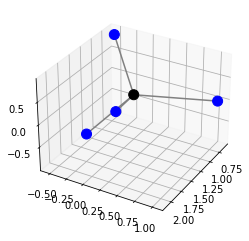

<Figure size 432x288 with 0 Axes>

In [7]:
xdata = np.array([0.99813803, 2.09441750, 0.63238996, 0.62561232, 0.64010219])
ydata = np.array([-0.00263872, -0.00242373, 1.03082951, -0.52974905, -0.50924801])
zdata = np.array([-0.00464602, 0.00417336, 0.00417296, 0.88151021, -0.90858051]) 
ax = plt.axes(projection='3d')
#plot atoms as spheres
ax.scatter3D(xdata, ydata, zdata, c = ('black','blue','blue','blue','blue'), s = 100, depthshade = False, alpha = 1)
#plot bonds as lines
ax.plot3D(xdata[0:2], ydata[0:2], zdata[0:2], c = 'grey')  # bonds
ax.plot3D(xdata[0:3:2], ydata[0:3:2], zdata[0:3:2], c = 'grey')  # bonds
ax.plot3D(xdata[0:4:3], ydata[0:4:3], zdata[0:4:3], c = 'grey')  # bonds
ax.plot3D(xdata[0:5:4], ydata[0:5:4], zdata[0:5:4], c = 'grey')  # bonds
# you can rotate by changing the two "viewing angles"
ax.view_init(30,30)  # (vertical, horizontal)
fig = plt.figure()

In this Jupyter notebook, we will mainly use the atomization energy to characterize the data. The atomization energy describes the (negative of) energy required to tear apart the molecule into individual atoms in vaccum. That is, negative of the formation energy.

In [8]:
print("range of atomization energy:", qm7b['ae_pbe0'].min(), qm7b['ae_pbe0'].max())

range of atomization energy: -2212.56640625 -410.2861633300781


# Descriptive Statistics 

## 1. Sample

### Sample and population

- Sample helps to answer questions about the population
    - Population: the **entire** group being studied
    - Sample: a **part** of the population being studied
- Our data come from populations, but in statistics, we don't always have access to the whole population. 


For qm7b, the set of all 7211 molecules is the population. A sample can be drawn from the population. Let's "randomly" take two sample, 1% and 10% of the molecules, respectively.

In [19]:
qm7b_sample1 = qm7b.sample(frac = 0.01, random_state = 2020)  # frac means to draw one percent of the population
# sample 2
qm7b_sample2 = qm7b.sample(frac = 0.1, random_state = 2020)  # other number works as well, it doesn't need to be 2020.

How different are the sample and population? We compare the sample and the population by plotting histograms of their atomization energies.

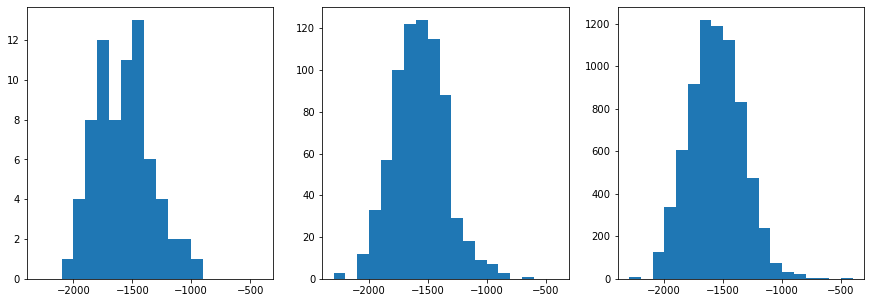

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5));  # 3 different axes

# histogram of sample1
axes[0].hist(qm7b_sample1['ae_pbe0'], bins = 19, range = (-2300, -400))  # 70 molecules

# histogram of sample2
axes[1].hist(qm7b_sample2['ae_pbe0'], bins = 19, range = (-2300, -400))  # 700 molecules

# histogram of population
axes[2].hist(qm7b['ae_pbe0'], bins = 19, range = (-2300, -400))  # bins=19: one bins per 100

plt.show()

### Sample bias and sampling error

In order to do be representative, the sample needs to be: 
- Large enough -> large sample size 
- Random sampling -> avoid bias

However, no samples are perfect. You need to allow room for error
- Sampling error


Let's make a subset of molecules that include S

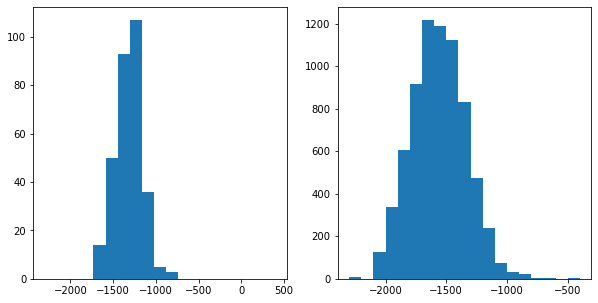

In [28]:
qm7b_sample3 = qm7b.loc[qm7b['n_S'] != 0]  #  slighly goes to the right hand-sided because less bonding, less atomization energy
fig2, axes2 = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5));
# compare the histogram of this special sample and that of the population
axes2[0].hist(qm7b_sample3['ae_pbe0'], bins = 19, range = (-2300, 400))
axes2[1].hist(qm7b['ae_pbe0'], bins = 19, range=(-2300, -400))
fig2.show()

Where does this difference come from? How to quantify these differences?

(array([  0.,   0.,   0.,  19.,  58., 183.,  40.,   8.,   0.,   0.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

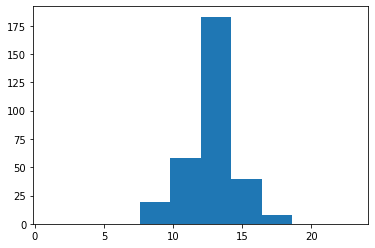

In [25]:
plt.hist(qm7b_sample3['n_H'] + qm7b_sample3['n_C'] + qm7b_sample3['n_N'] + qm7b_sample3['n_O'] + qm7b_sample3['n_S'] + qm7b_sample3['n_Cl'], range = (1, 23))
# total number of atoms

(array([   0.,    3.,   12.,   85.,  416., 2039., 2005., 1676.,  803.,
         172.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

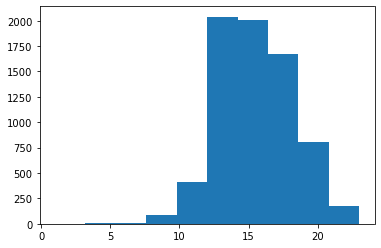

In [26]:
plt.hist(qm7b['n_H'] + qm7b['n_C'] + qm7b['n_N'] + qm7b['n_O'] + qm7b['n_S'] + qm7b['n_Cl'], range = (1, 23))

### Sample and population in materials science and chemistry

Definition of "sample" and "population" in materials science and chemistry are problem-specific.
For example
- QM7b is a sample of GDB-13. (recall that GDB-13 is a database of 970 million stable and synthetically accessible organic molecules)
- GDB-13 is a sample of all molecules that may exist.

### Sampling method

Simple random sampling is to be used in this class: use .sample

In [ ]:
# hands_on session week4

Replacement or not: .sample(replace = True or False). 

"Without replacement": one deliberately avoids choosing any member of the population more than once.

For a small sample from a large population, sampling without replacement is approximately the same as sampling with replacement, since the probability of choosing the same individual twice is low.

Replacement is important for Bootstrap and Cross-Validation (will be covered 2 weeks after).

In [ ]:
sample = qm7b.sample(frac=1.0, replace = True)
sample['ae_pbe0'].hist()

## 2. Central tendency and variability

### Central Tendency

What is it?

A descriptive statistic used to determine a **single** value that 
- Accurately describes the **center** of the entire data set
- Best represents the **entire** data set

Goal:
- To summarize the data set into a single value 
- Make it possible to compare across different data sets (by comparing their central tendencies)

3 common types of statistics for central tendency: 

Mean, Median, and Mode


**Mean**: the average

In [29]:
print("mean:", np.mean(qm7b['ae_pbe0']))
# output the mean of 'ae_pbe0' of sample1, sample2, and sample3
print("mean_sample1: ", np.mean(qm7b_sample1['ae_pbe0']))
print("mean_sample2: ", np.mean(qm7b_sample2['ae_pbe0']))
print("mean_sample3: ", np.mean(qm7b_sample3['ae_pbe0']))

# data must be numerical
# you may also try qm7b['ae_pbe0'].mean() 

mean: -1563.325120150638
mean_sample1:  -1579.1668082343208
mean_sample2:  -1569.5771581726497
mean_sample3:  -1307.3558226746397


We can compare population mean and sample mean to determine whether the sample is representative of the population.

Sometimes mean is not meaningful, when we have outliers. (if we have 5 data, and one of them is very different than the other 4)
Solution:

**Median**: the midpoint of an ordered set of data (50% of all data are greater than the median. Another 50% are lower than the median)

**Mode**: the most frequently occurring data. Data does not have to be ordered.

### Variability

What is it? 

Describe the spread of data around the center (A summary of how different are the other data from the center)

**Variance**: The average of the squared distances between each point and the mean of the dataset.

$\sigma^2 = \frac{1}{N}\Sigma_{i=1}^{N} (x_i - \bar{x})^2$ (N points, each point at $x_i$, average is $\bar{x}$)

**Standard Deviation**: The square-root of variance.

$\sigma = \sqrt{\frac{1}{N}\Sigma_{i=1}^{N} (x_i - \bar{x})^2)}$ 

The standard deviation of a sample has a slightly different form than that of a population (N vs. N-1)

$s = \sqrt{\frac{1}{N-1}\Sigma_{i=1}^{N} (x_i - \bar{x})^2}$